# Parallelizable Reachability Analysis Algorithms for Feed-Forward Neural Networks
[link](https://luanvietnguyen.github.io/formalise2019.pdf)

## Reachability analysis of FNN
The reachability analysis of a FNN with a bounded convex polyhedron input set defined as
$$
I=\left\{x \mid A x \leq b, x \in \mathbb{R}^{n}\right\}
$$
where $x$ is the input vector, and $n$ is the dimension of the input space.

## Safety verification of FNN
The safety properties we consider are a set of linear constraints on the outputs of the FNN defined as:
$$
S=\left\{y \mid C y \leq d, y \in \mathbb{R}^{m}\right\}
$$
where $y$ is the output vector, and $m$ is the dimension of the output space.

In [1]:
# Define polyhedron as A x ≤ b, A can be any shape like (?, n)
import numpy as np
from itertools import combinations 
import matplotlib.pyplot as plt

A = np.array([[0.3, 0.1], 
              [0.4, 0.3], 
              [0.4, 0.5]])
b = np.array([0, 1, 1])

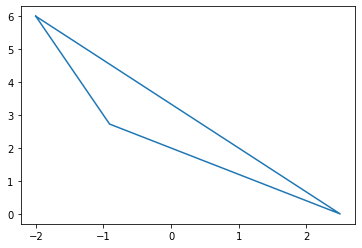

In [2]:
def solve(A, b):
    comb = combinations(np.arange(len(A)), 2) 
    coord = []
    for idx in comb:
        pnt = (np.linalg.inv(A[idx, :]) @ b[idx, ].reshape(2, 1)).flatten()
        coord.append(pnt)
    coord.append(coord[0])
    
    return coord
    
def draw(A, b):
    coord = solve(A, b)

    xs, ys = zip(*coord) #create lists of x and y values

    plt.figure()
    plt.plot(xs,ys)

draw(A, b)

## stepReLU operation
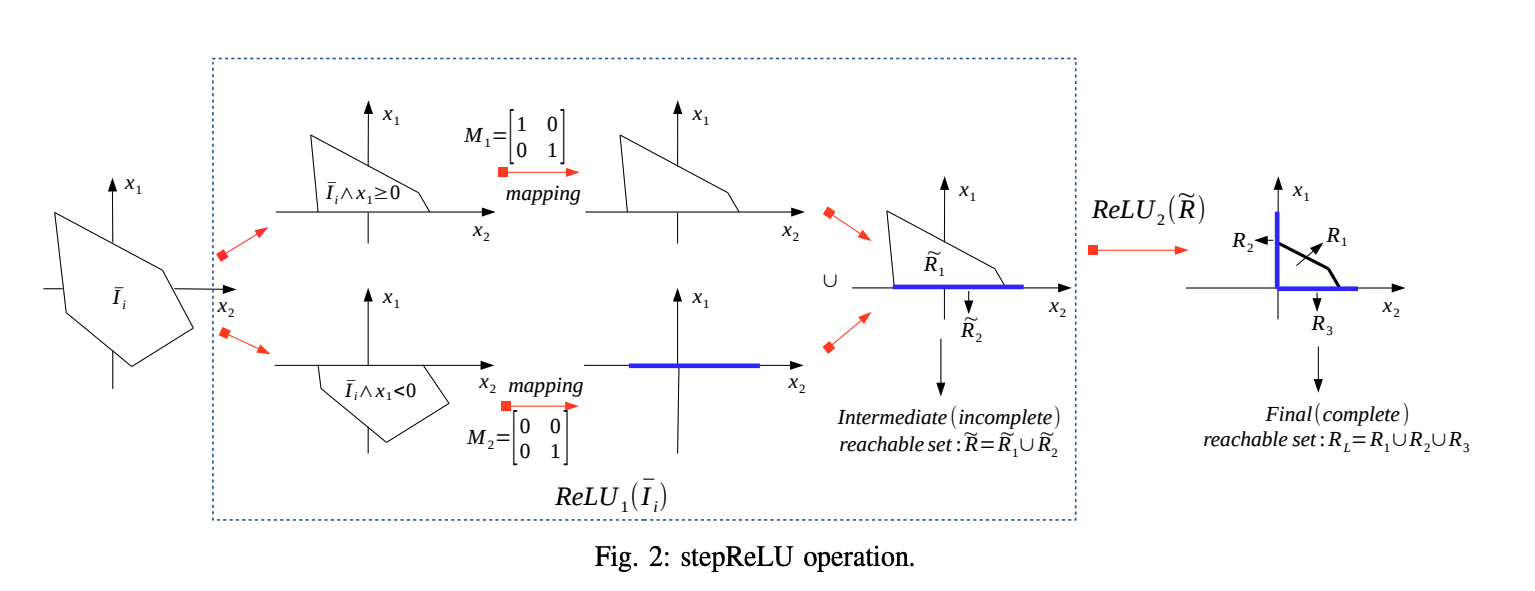
Compute ReLU on different dimension separately and compute the intersection between. 

? Any code available to operate on polyhedron?

## Parallelize 
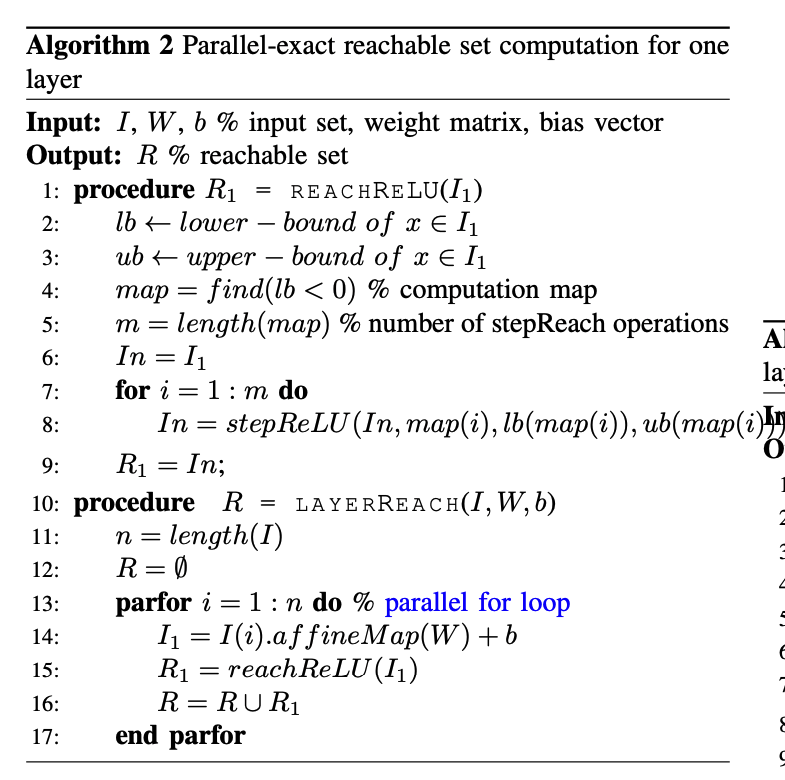

? How to compute the upper and lower. 

# Summary 

1. The constraints and safety property are polyhedrons. 
2. The reachable set is exact. 
3. Compute the Polyhedrons for each neuron separately, and thus can parallelize. ?Maybe directly replace the reachReLU matrix operation with any optimization can have better performance due to the computation efficient for the matrix. In addition, it can cut at most around half of constraints for each layer (it must be worse in reality), if the network is not deep, this may not be a big deal for solvers.  
4. How to check whether these polyhedrons violates the safety constraints, any solver available?
5. Typo: Algorithm 1 # L17 $x_{max} \geq 0$. 